In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
import shap

shap.initjs()

In [15]:
import joblib

X_train = joblib.load('small_data/X_train.pkl')
y_train = joblib.load('small_data/y_train.pkl')

X_test = joblib.load('small_data/X_test.pkl')
y_test = joblib.load('small_data/y_test.pkl')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [7]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [8]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [9]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [10]:
CV_rfc.best_score_

0.9507375027468505

In [12]:
rfc= RandomForestClassifier(n_estimators=1000, n_jobs= -1)

rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [14]:
rfc.score(X_test,y_test)

0.9560654357370542

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[82820 10756]
 [  862  5324]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     93576
           1       0.33      0.86      0.48      6186

    accuracy                           0.88     99762
   macro avg       0.66      0.87      0.71     99762
weighted avg       0.95      0.88      0.91     99762

0.8835428319400173


In [19]:
explainer = shap.TreeExplainer(model,df=X_train)

In [20]:
shap_values = explainer.shap_values(X_train)

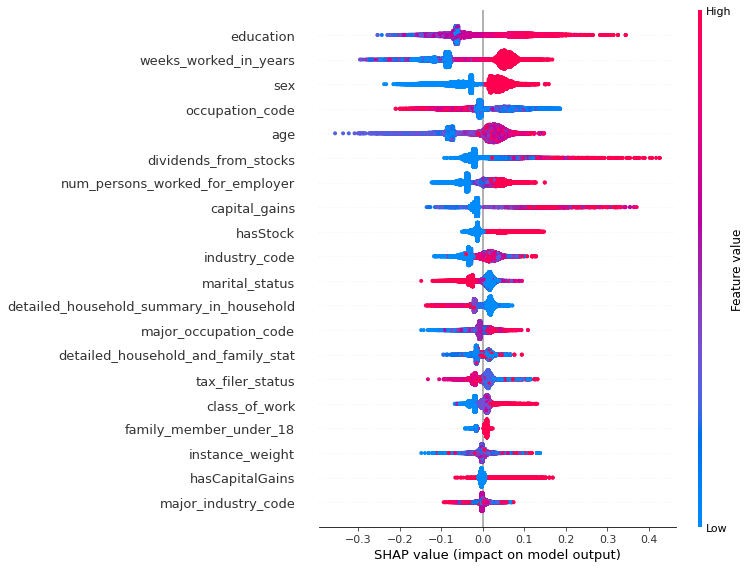

In [26]:
shap.summary_plot(shap_values[1], X_train)

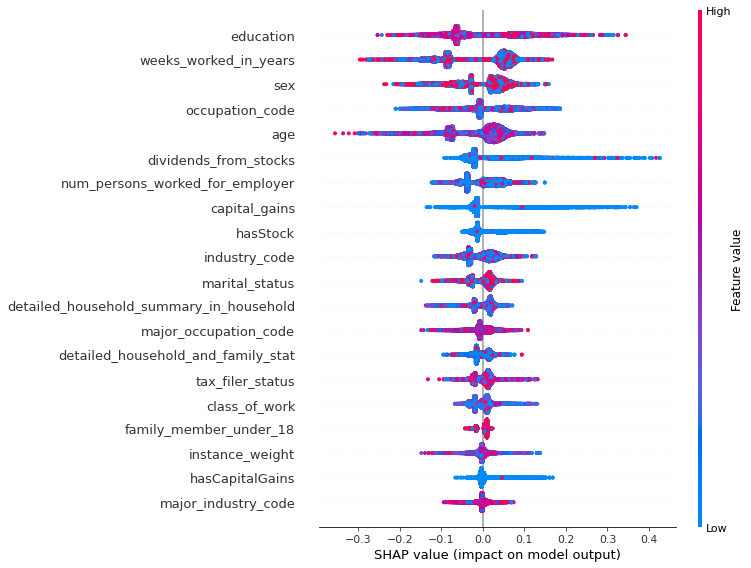

In [35]:
shap.summary_plot(shap_values[1], X_test[:30000])

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1],X_test)

In [ ]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(model.predict_proba,X_train)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

In [7]:
import matplotlib.pyplot as plt
f = plt.figure()

shap.summary_plot(rf_shap_values, X_test)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

Index(['age', 'class_of_work', 'industry_code', 'occupation_code', 'education',
       'wage_per_hour', 'enrolled_in_edu_inst_last_wk', 'marital_status',
       'major_industry_code', 'major_occupation_code', 'race',
       'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'dividends_from_stocks',
       'tax_filer_status', 'region of previous residence',
       'state_of_previous_residence', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'instance_weight',
       'migration_code_change_in_msa', 'migration_code_change_in_reg',
       'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_member_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
       'own_business_or_self_